# Lab 4: Atwood's Pulley

$\textbf{Objective}$

The objective of this experiment is to determine the mass of Atwood’s pulley by analyzing the relationship between the system’s acceleration and the mass difference between the two suspended masses.

$\textbf{Theory}$

An Atwood's pulley consists of two masses connected by a light rope suspended over a pulley. When the masses differ, the system accelerates as a result of the unbalanced gravitational force.

The figure `atwoods pulley.jpg` illustrates a simple Atwood's pulley system.

According to Newton's second law of motion, the acceleration of the system depends on the net force acting on both masses and the total mass of the system, which includes the two masses, the light rope, and the pulley.

A linear relationship exists between the mass difference of the two suspended masses and the acceleration of the system. The slope and intercept of the resulting linear fit are used to calculate the mass of the pulley, $m_p$.

According to Newton's Second Law of Motion, the relationship between the acceleration of the system and the mass difference can be expressed as:

$$
(m_1-m_2-m_f)g = (m_1+m_2+m_p)a
$$

Here, $m_1$ and $m_2$ are the two masses. $m_f$ is the frictional loss. $m_p$ is the mass of the pulley to be calculated. $g$ is the acceleration due to gravity, and $a$ is the acceleration of the system.

$\textbf{Experiment Method/Procedure}$

For this experiment, two slotted mass hangers were used, where the mass of each hanger was 50g and some slotted masses (two 5g, two 2g and three 1g). Also, the masses of the two mass hangers were measured using a balance scale up to a precision of $\pm0.01g$, yielding the masses of the hangers as 52.183g and 50.145g.

The experimental setup is represented as in the figure `atwoods pulley.jpg`. The two hangers were connected by a light string over a smart pulley, which was further connected to LoggerPro in a Laptop via USB for transmitting data.

Initially in the experiment, all of the  17g of slotted masses were added to the heavier hanger, and that combined mass was assumed to be $m_1$ while the other hanger was assumed to be $m_2$.

The height of the pulley system was adjusted so that the falling mass hit the ground before the rising mass reached the pulley, preventing damage to the apparatus. A fall distance of 1 m was maintained to ensure sufficient data collection.

The system was then released, and LoggerPro was stopped just before the falling mass reached the ground.

The acceleration of the system was determined using LoggerPro by applying a linear fit to the velocity-time graph. The corresponding mass difference and acceleration values were recorded for each trial. This process was repeated by transferring 1g of mass from $m_1$ to $m_2$ until the mass difference was less than 3g.

The rope length and mass were calculated to be $1.52\pm 0.05$m and $0.612\pm 0.01$g, respectively.

The data was recorded in a CSV file, and then an analysis was performed on Python to find the mass of the pulley, $m_p$. A scatter plot of acceleration v/s mass difference was generated, and its linear fit was applied using numpy.polyfit() to determine the slope,intercept, and their uncertainties.

$\textbf{Results}$

From Newton's second law of motion, the relationship between the acceleration of the system and the mass difference was given by:
$$
(m_1-m_2-m_f)g = (m_1+m_2+m_p)a
$$
which can be simplified to
$$
(m_1-m_2) = \frac{m_1+m_2+m_p}{g}a+m_f
$$


Here, $\frac{m_1+m_2+m_p}{g}$ represents the slope of the line and $m_f$ corresponds to the intercept of. So, we can find the mass of the pulley as:

$$
m_p = (slope \times g) - (m_1+m_2)
$$

From the analysis in Python, the slope of the scatter plot is: $12.83\pm0.13$

Hence, the mass of the pulley was determined to be:
$$
m_p = 23.56\pm 1.28g
$$

$\textbf{Discussion}$

The image `lab_04.jpg` represents the plot of the mass difference v/s the acceleration of the system.

The calculated mass of the pulley is $m_p = 23.56\pm 1.28g$, which is significantly higher than the actual manufacturer's mass of 5.5g. This difference might have occurred due to the friction in the pulley, air resistance or measurement errors.

However, it is clear from the analysis that the acceleration increases linearly with the mass difference, which agrees with Newton's second law of motion.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

The slope is 12.84 ± 0.14 [g]
The intercept is 0.73 ± 0.12 [g]
The approximate pulley mass is mp = 23.62 g
The frictional mass equivalent is mf = 0.73 ± 0.12 g


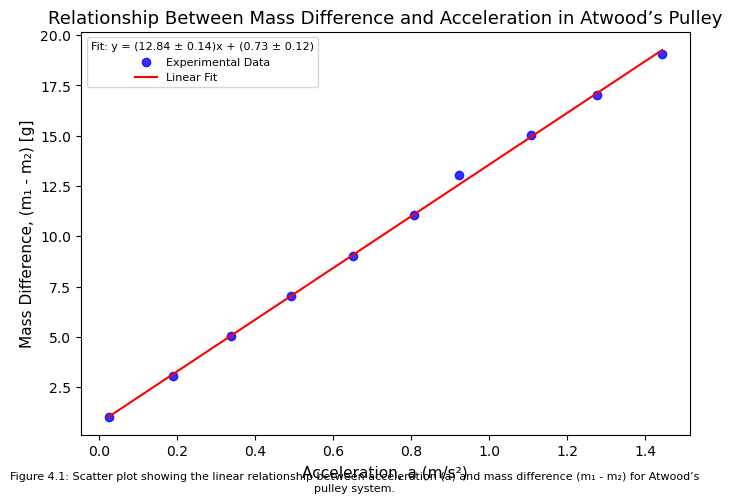

In [8]:
csv_data = pd.read_csv("Atwoods_Pulley.csv")
accel = np.array(csv_data["a"])
md = np.array(csv_data["md"])

m1 = 52.183
m2 = 50.145

plt.figure(figsize=(7,5))
plt.scatter(accel, md, color='blue', label='Experimental Data', alpha=0.8)

coeffs, covariance = np.polyfit(accel, md, 1, cov=True)
slope, intercept = coeffs
slope_uncer = np.sqrt(covariance[0,0])
intercept_uncer = np.sqrt(covariance[1,1])
l_fit = slope * accel + intercept

plt.plot(accel, l_fit, color='red', label='Linear Fit')

plt.title("Relationship Between Mass Difference and Acceleration in Atwood’s Pulley", fontsize=13)
plt.xlabel("Acceleration, a (m/s²)", fontsize=11)
plt.ylabel("Mass Difference, (m₁ - m₂) [g]", fontsize=11)

legend_title = (f"Fit: y = ({slope:.2f} ± {slope_uncer:.2f})x + "
                f"({intercept:.2f} ± {intercept_uncer:.2f})")
plt.legend(title=legend_title, loc='best', fontsize=8, title_fontsize=8)

mp = (slope * 9.81) - (m1 + m2)
mf = intercept
mf_uncer = intercept_uncer

print(f"The slope is {slope:.2f} ± {slope_uncer:.2f} [g]")
print(f"The intercept is {intercept:.2f} ± {intercept_uncer:.2f} [g]")
print(f"The approximate pulley mass is mp = {mp:.2f} g")
print(f"The frictional mass equivalent is mf = {mf:.2f} ± {mf_uncer:.2f} g")

caption = (
    "Figure 4.1: Scatter plot showing the linear relationship between acceleration (a) "
    "and mass difference (m₁ - m₂) for Atwood’s pulley system."
)
plt.figtext(0.5, 0.01, caption, wrap=True, ha='center', fontsize=8)

plt.tight_layout()
plt.savefig("lab_04.jpeg")
plt.show()